In [110]:
#pip install scikit-plot

In [100]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
import time
import datetime

from sklearn.model_selection import cross_val_score,train_test_split, StratifiedKFold, learning_curve, KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedShuffleSplit,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.utils import class_weight

from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Import data

In [2]:
hotel_res = pd.read_csv('Hotel Reservations.csv')

In [3]:
hotel_res

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Sample Split

In [4]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=20)
for train_index, test_index in split.split(hotel_res, hotel_res["booking_status"]):
    train_data = hotel_res.iloc[train_index]
    test_data = hotel_res.iloc[test_index]

In [5]:
train_data['booking_status'].value_counts()/len(train_data)

Not_Canceled    0.672377
Canceled        0.327623
Name: booking_status, dtype: float64

In [6]:
test_data['booking_status'].value_counts()/len(test_data)

Not_Canceled    0.672333
Canceled        0.327667
Name: booking_status, dtype: float64

# EDA - Exploring data analysis

In [7]:
eda_train_data = train_data

### Categorical data

<Figure size 432x288 with 0 Axes>

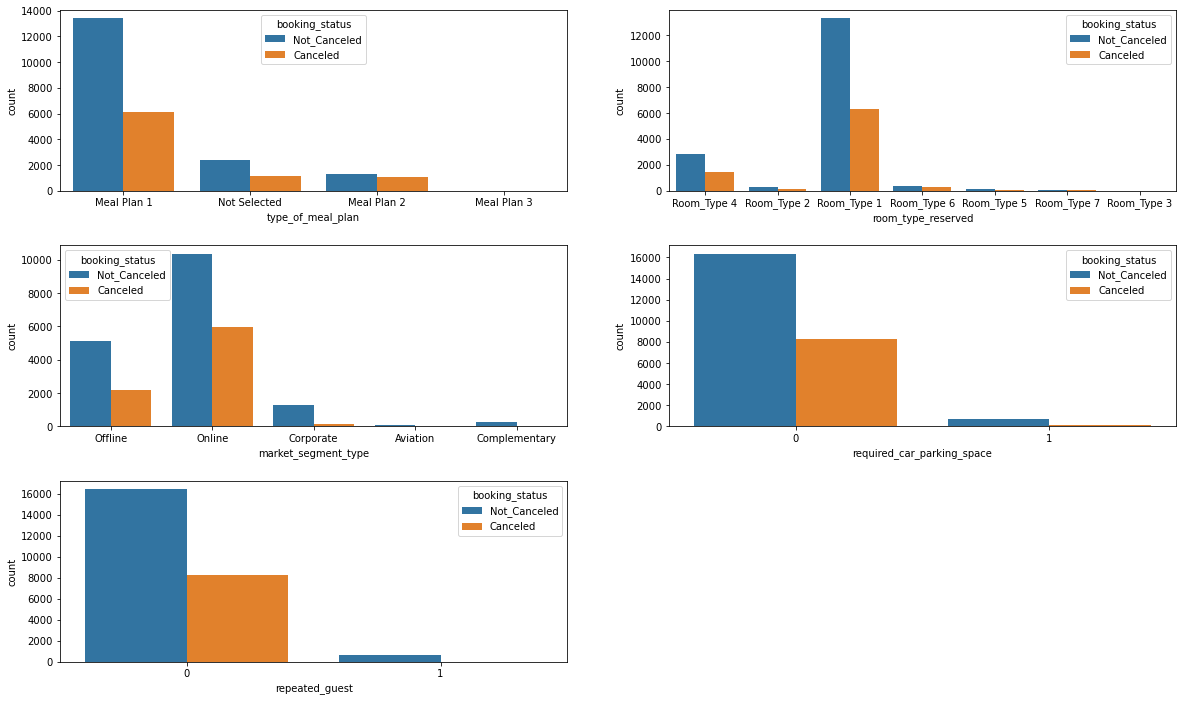

In [8]:
plt.figure()
plt.figure(figsize=(20,12))
plt.subplot(3, 2, 1)
sns.countplot(x = 'type_of_meal_plan', data= eda_train_data, hue= 'booking_status')
plt.subplot(3, 2, 2)
sns.countplot(x = 'room_type_reserved', data= eda_train_data, hue= 'booking_status')
plt.subplot(3, 2, 3)
sns.countplot(x = 'market_segment_type', data= eda_train_data, hue= 'booking_status')
plt.subplot(3, 2, 4)
sns.countplot(x = 'required_car_parking_space', data= eda_train_data, hue= 'booking_status')
plt.subplot(3, 2, 5)
sns.countplot(x = 'repeated_guest', data= eda_train_data, hue= 'booking_status')
plt.subplots_adjust(hspace=0.3)
plt.show()

In [9]:
eda_train_data_no_of_adults = eda_train_data.groupby(['booking_status','no_of_adults']).count()/len(eda_train_data)
eda_train_data_no_of_adults.reset_index(inplace=True)

eda_train_data_no_of_children = eda_train_data.groupby(['booking_status','no_of_children']).count()/len(eda_train_data)
eda_train_data_no_of_children.reset_index(inplace=True)

eda_train_data_no_of_weekend_nights = eda_train_data.groupby(['booking_status','no_of_weekend_nights']).count()/len(eda_train_data)
eda_train_data_no_of_weekend_nights.reset_index(inplace=True)

eda_train_data_no_of_week_nights = eda_train_data.groupby(['booking_status','no_of_weekend_nights']).count()/len(eda_train_data)
eda_train_data_no_of_week_nights.reset_index(inplace=True)

eda_train_data_arrival_year = eda_train_data.groupby(['booking_status','arrival_year']).count()/len(eda_train_data)
eda_train_data_arrival_year.reset_index(inplace=True)

eda_train_data_arrival_month = eda_train_data.groupby(['booking_status','arrival_month']).count()/len(eda_train_data)
eda_train_data_arrival_month.reset_index(inplace=True)

<Figure size 432x288 with 0 Axes>

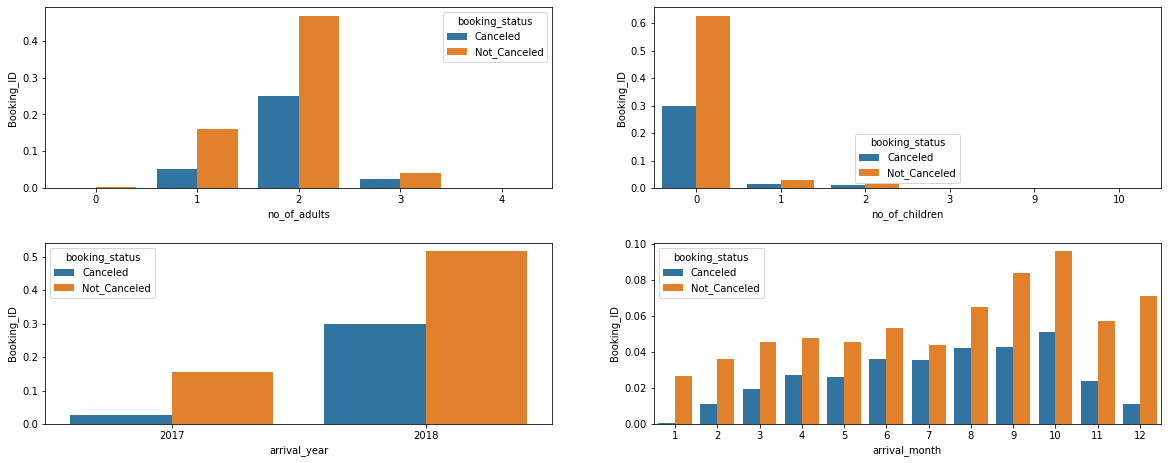

In [10]:
plt.figure()
plt.figure(figsize=(20,12))
plt.subplot(3, 2, 1)
sns.barplot(x = 'no_of_adults' , y = 'Booking_ID', data = eda_train_data_no_of_adults , hue="booking_status" )
plt.subplot(3, 2, 2)
sns.barplot(x = 'no_of_children' , y = 'Booking_ID', data = eda_train_data_no_of_children , hue="booking_status" )
#plt.subplot(3, 2, 3)
#sns.barplot(x = 'no_of_weekend_nights' , y = 'Booking_ID', data = eda_train_data_no_of_weekend_nights , hue="booking_status" )
#plt.subplot(3, 2, 4)
#sns.barplot(x = 'no_of_week_nights' , y = 'Booking_ID', data = eda_train_data_no_of_week_nights , hue="booking_status" )
plt.subplot(3, 2, 3)
sns.barplot(x = 'arrival_year' , y = 'Booking_ID', data = eda_train_data_arrival_year , hue="booking_status" )
plt.subplot(3, 2, 4)
sns.barplot(x = 'arrival_month' , y = 'Booking_ID', data = eda_train_data_arrival_month , hue="booking_status" )

plt.subplots_adjust(hspace=0.3)
plt.show()

In [11]:
eda_train_data['no_nights_stay'] = eda_train_data.apply(lambda x: x['no_of_weekend_nights']+x['no_of_week_nights'], axis=1)

<ipython-input-11-1858b24ba7cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['no_nights_stay'] = eda_train_data.apply(lambda x: x['no_of_weekend_nights']+x['no_of_week_nights'], axis=1)


In [12]:
eda_train_data['no_user'] = eda_train_data.apply(lambda x: x['no_of_adults']+x['no_of_children'], axis=1)

<ipython-input-12-53d36240dd06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['no_user'] = eda_train_data.apply(lambda x: x['no_of_adults']+x['no_of_children'], axis=1)


In [13]:
eda_train_data['arrival_date']=eda_train_data.apply(lambda row: 28 if (row['arrival_month'] == 2 and row['arrival_date'] > 28) else row['arrival_date'], axis=1)

<ipython-input-13-620adc93ad75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['arrival_date']=eda_train_data.apply(lambda row: 28 if (row['arrival_month'] == 2 and row['arrival_date'] > 28) else row['arrival_date'], axis=1)


In [14]:
eda_train_data['complete_arrival_date']=eda_train_data.apply(lambda x: datetime.date(x['arrival_year'], x['arrival_month'], x['arrival_date']), axis=1)

<ipython-input-14-033ff41aba49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['complete_arrival_date']=eda_train_data.apply(lambda x: datetime.date(x['arrival_year'], x['arrival_month'], x['arrival_date']), axis=1)


In [15]:
eda_train_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_nights_stay,no_user,complete_arrival_date
6023,INN06024,2,0,2,3,Meal Plan 1,0,Room_Type 4,51,2017,...,Offline,0,0,0,60.0,0,Not_Canceled,5,2,2017-11-12
14634,INN14635,2,0,1,1,Meal Plan 1,0,Room_Type 2,75,2018,...,Online,0,0,0,78.0,0,Not_Canceled,2,2,2018-03-21
6927,INN06928,2,0,2,2,Meal Plan 1,0,Room_Type 1,143,2018,...,Online,0,0,0,96.3,0,Canceled,4,2,2018-08-26
35964,INN35965,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,...,Online,0,0,0,135.0,1,Not_Canceled,1,2,2017-12-31
18615,INN18616,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,...,Online,0,0,0,101.0,0,Canceled,1,2,2018-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,INN16764,3,0,2,2,Meal Plan 1,0,Room_Type 4,48,2018,...,Online,0,0,0,158.4,0,Not_Canceled,4,3,2018-10-15
26289,INN26290,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,...,Offline,0,0,0,117.0,0,Canceled,2,2,2018-09-16
4701,INN04702,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,...,Online,0,0,0,115.0,1,Canceled,2,2,2018-08-18
18784,INN18785,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,...,Complementary,0,0,0,0.0,1,Not_Canceled,3,1,2017-08-23


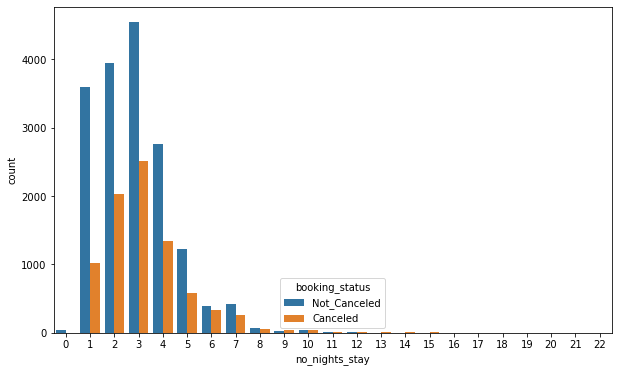

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'no_nights_stay', data= eda_train_data, hue= 'booking_status')

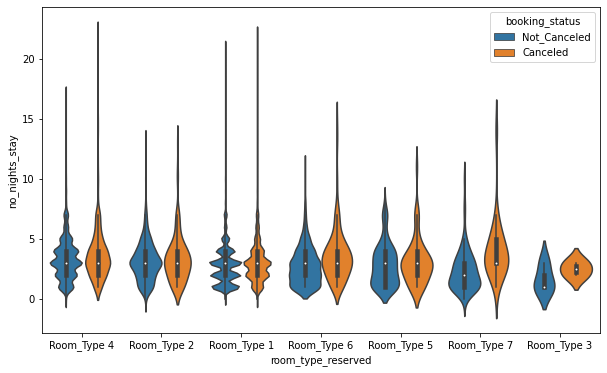

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(data=eda_train_data, x="room_type_reserved", y="no_nights_stay", hue="booking_status")

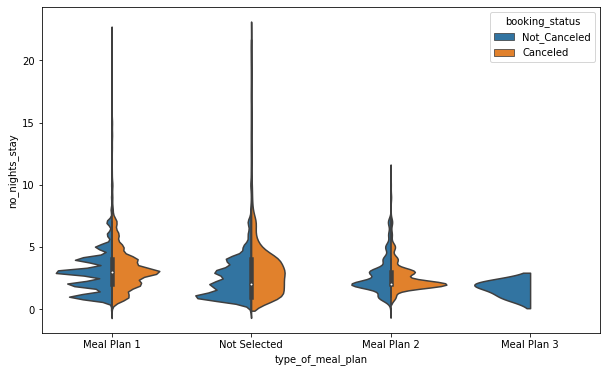

In [18]:
plt.figure(figsize=(10,6))
sns.violinplot(data=eda_train_data, x="type_of_meal_plan", y="no_nights_stay", hue="booking_status",split=True)

<Figure size 1440x1080 with 0 Axes>

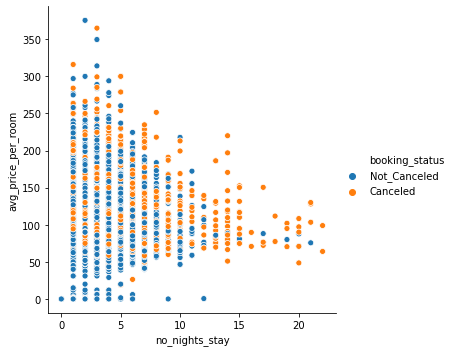

In [19]:
plt.figure(figsize=(20,15))
sns.relplot(data=eda_train_data, x="no_nights_stay", y="avg_price_per_room", hue="booking_status")

<Figure size 1440x1440 with 0 Axes>

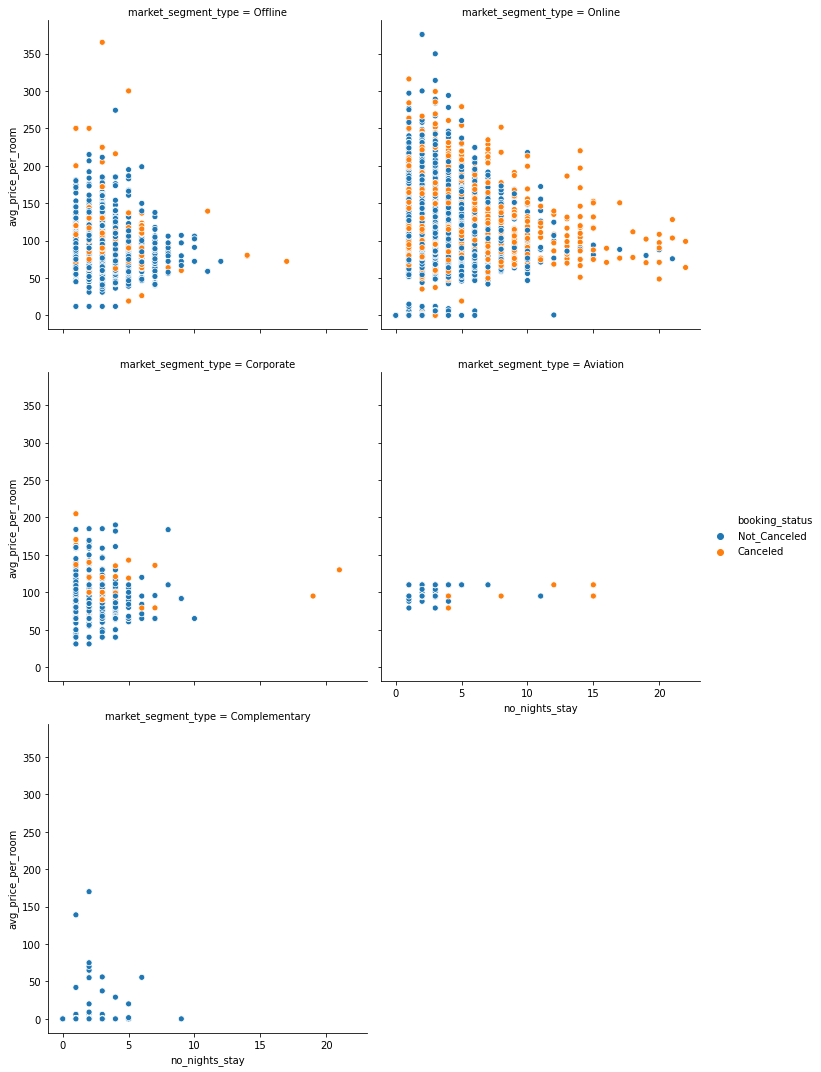

In [20]:
plt.figure(figsize=(20,20))
sns.relplot(data=eda_train_data, x="no_nights_stay", y="avg_price_per_room"
            , hue="booking_status",col="market_segment_type",col_wrap=2)

<Figure size 1440x1440 with 0 Axes>

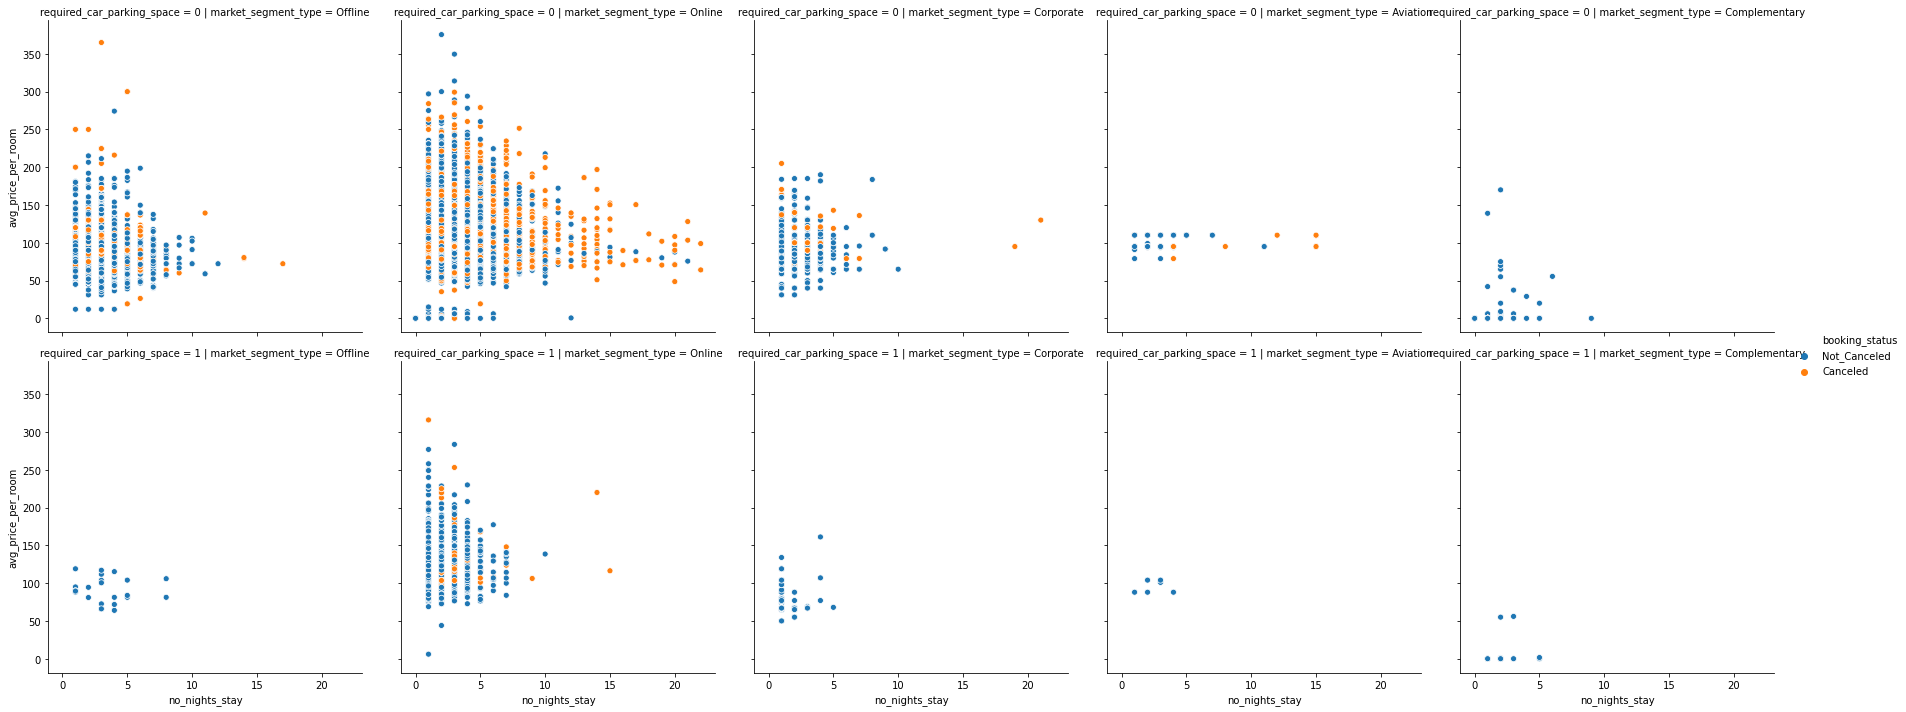

In [21]:
plt.figure(figsize=(20,20))
sns.relplot(data=eda_train_data, x="no_nights_stay", y="avg_price_per_room"
            , hue="booking_status",col="market_segment_type",row="required_car_parking_space")

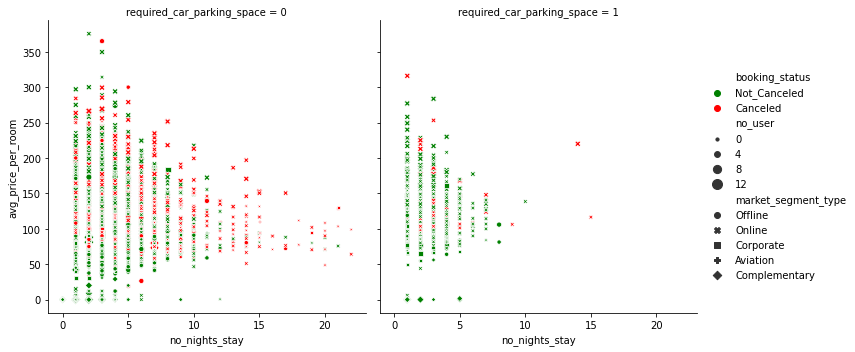

In [22]:
sns.relplot(
    data=eda_train_data, x="no_nights_stay", y="avg_price_per_room"
            , hue="booking_status",col="required_car_parking_space", size="no_user", style="market_segment_type",
    palette=["g", "r"], sizes=(10, 100)
)


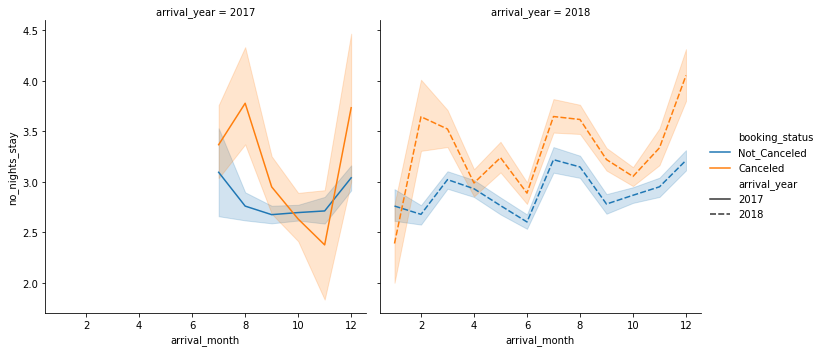

In [23]:
sns.relplot(
    data=eda_train_data, x="arrival_month", y="no_nights_stay",
    col="arrival_year",
    hue="booking_status", 
    style="arrival_year", 
    kind="line",
)

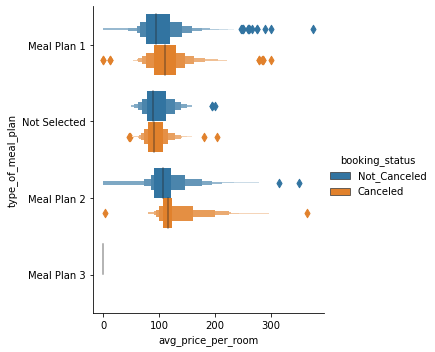

In [24]:
sns.catplot(data=eda_train_data, x="avg_price_per_room", y="type_of_meal_plan", hue="booking_status", kind="boxen")

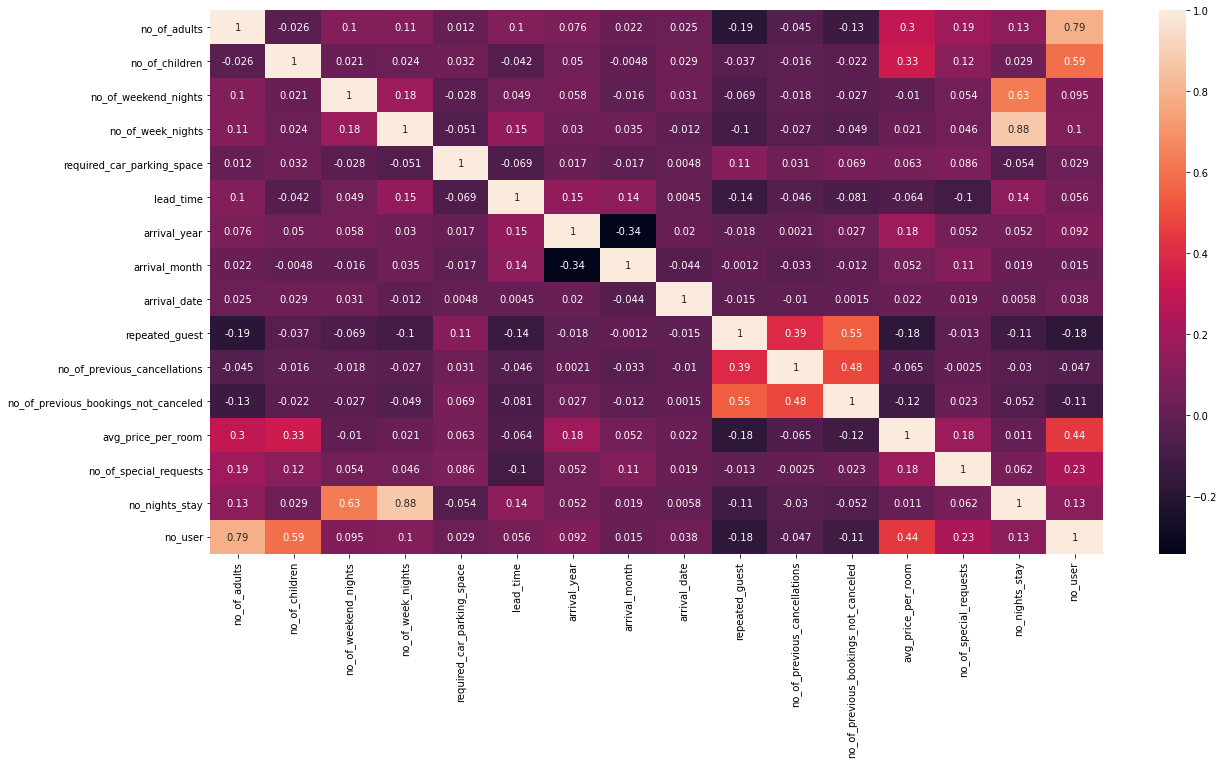

In [25]:
plt.figure(figsize=(20,10))
sns.heatmap(eda_train_data.corr(), annot=True)

In [26]:
eda_train_data['booking_status_num'] = eda_train_data.apply(lambda x: 1 if x['booking_status']=='Canceled' else 0,axis=1)

<ipython-input-26-78e65d51dbf0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['booking_status_num'] = eda_train_data.apply(lambda x: 1 if x['booking_status']=='Canceled' else 0,axis=1)


In [27]:
eda_train_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_nights_stay,no_user,complete_arrival_date,booking_status_num
6023,INN06024,2,0,2,3,Meal Plan 1,0,Room_Type 4,51,2017,...,0,0,0,60.0,0,Not_Canceled,5,2,2017-11-12,0
14634,INN14635,2,0,1,1,Meal Plan 1,0,Room_Type 2,75,2018,...,0,0,0,78.0,0,Not_Canceled,2,2,2018-03-21,0
6927,INN06928,2,0,2,2,Meal Plan 1,0,Room_Type 1,143,2018,...,0,0,0,96.3,0,Canceled,4,2,2018-08-26,1
35964,INN35965,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,...,0,0,0,135.0,1,Not_Canceled,1,2,2017-12-31,0
18615,INN18616,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,...,0,0,0,101.0,0,Canceled,1,2,2018-03-21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,INN16764,3,0,2,2,Meal Plan 1,0,Room_Type 4,48,2018,...,0,0,0,158.4,0,Not_Canceled,4,3,2018-10-15,0
26289,INN26290,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,...,0,0,0,117.0,0,Canceled,2,2,2018-09-16,1
4701,INN04702,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,...,0,0,0,115.0,1,Canceled,2,2,2018-08-18,1
18784,INN18785,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,...,0,0,0,0.0,1,Not_Canceled,3,1,2017-08-23,0


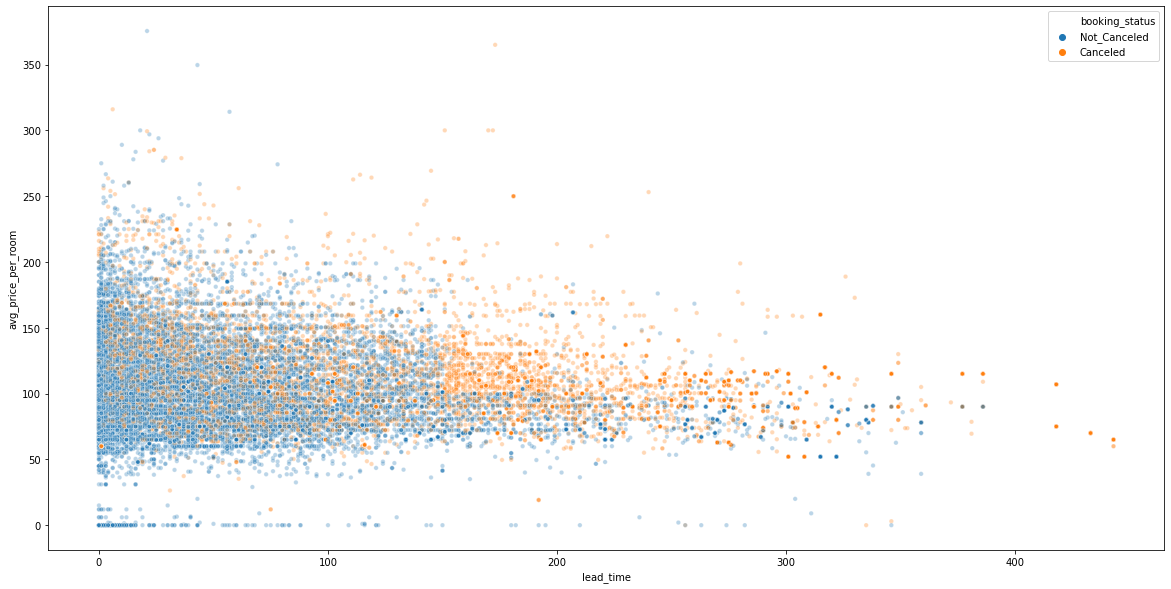

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=eda_train_data, x="lead_time", y="avg_price_per_room", hue="booking_status",s=20,alpha=0.3)

Text(0.5, 1.0, 'Factors Rank')

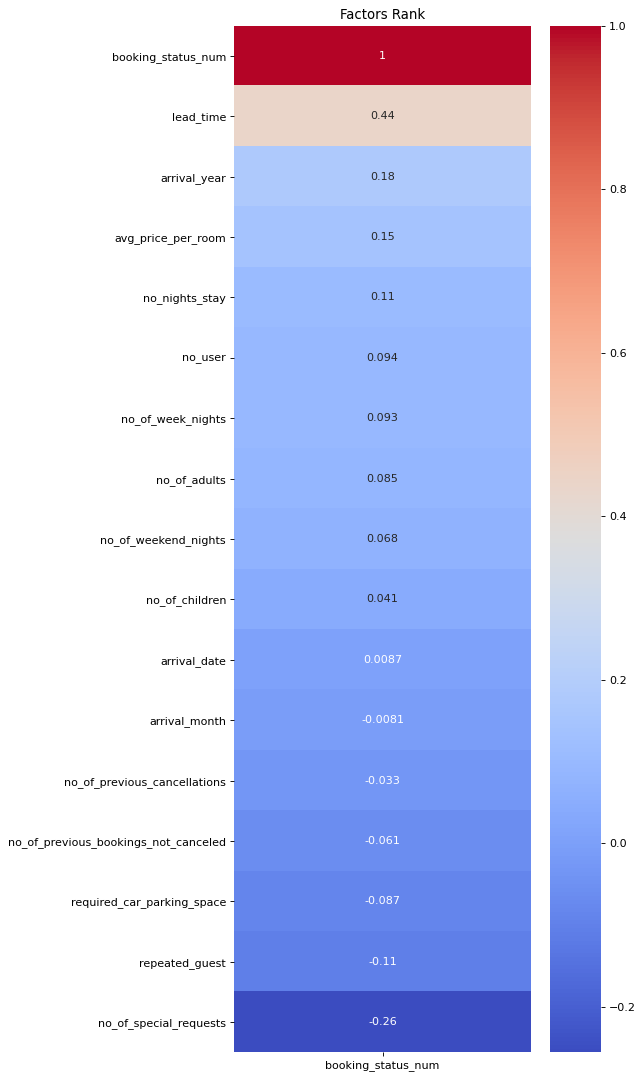

In [29]:
figure(figsize=(6, 17), dpi=80)
sns.heatmap(eda_train_data.corr()[['booking_status_num']].sort_values(by='booking_status_num', ascending=False), 
            annot = True , cmap = "coolwarm")
plt.title('Factors Rank')

# Feature Engineering

In [30]:
eda_train_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,no_nights_stay,no_user,complete_arrival_date,booking_status_num
6023,INN06024,2,0,2,3,Meal Plan 1,0,Room_Type 4,51,2017,...,0,0,0,60.0,0,Not_Canceled,5,2,2017-11-12,0
14634,INN14635,2,0,1,1,Meal Plan 1,0,Room_Type 2,75,2018,...,0,0,0,78.0,0,Not_Canceled,2,2,2018-03-21,0
6927,INN06928,2,0,2,2,Meal Plan 1,0,Room_Type 1,143,2018,...,0,0,0,96.3,0,Canceled,4,2,2018-08-26,1
35964,INN35965,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,...,0,0,0,135.0,1,Not_Canceled,1,2,2017-12-31,0
18615,INN18616,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,...,0,0,0,101.0,0,Canceled,1,2,2018-03-21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,INN16764,3,0,2,2,Meal Plan 1,0,Room_Type 4,48,2018,...,0,0,0,158.4,0,Not_Canceled,4,3,2018-10-15,0
26289,INN26290,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,...,0,0,0,117.0,0,Canceled,2,2,2018-09-16,1
4701,INN04702,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,...,0,0,0,115.0,1,Canceled,2,2,2018-08-18,1
18784,INN18785,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,...,0,0,0,0.0,1,Not_Canceled,3,1,2017-08-23,0


In [31]:
#eda_train_data['no_user'] , eda_train_data['no_nights_stay']

In [32]:
eda_train_data['overall_price'] = eda_train_data['avg_price_per_room'] * eda_train_data['no_nights_stay']
eda_train_data['average_price_per_room_person'] = eda_train_data['avg_price_per_room'] / eda_train_data['no_user']
eda_train_data['overall_price_per_room_person'] = eda_train_data['overall_price'] / eda_train_data['no_user']

<ipython-input-32-8f38f5cedb8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['overall_price'] = eda_train_data['avg_price_per_room'] * eda_train_data['no_nights_stay']
<ipython-input-32-8f38f5cedb8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eda_train_data['average_price_per_room_person'] = eda_train_data['avg_price_per_room'] / eda_train_data['no_user']
<ipython-input-32-8f38f5cedb8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [33]:
eda_train_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,avg_price_per_room,no_of_special_requests,booking_status,no_nights_stay,no_user,complete_arrival_date,booking_status_num,overall_price,average_price_per_room_person,overall_price_per_room_person
6023,INN06024,2,0,2,3,Meal Plan 1,0,Room_Type 4,51,2017,...,60.0,0,Not_Canceled,5,2,2017-11-12,0,300.0,30.00,150.00
14634,INN14635,2,0,1,1,Meal Plan 1,0,Room_Type 2,75,2018,...,78.0,0,Not_Canceled,2,2,2018-03-21,0,156.0,39.00,78.00
6927,INN06928,2,0,2,2,Meal Plan 1,0,Room_Type 1,143,2018,...,96.3,0,Canceled,4,2,2018-08-26,1,385.2,48.15,192.60
35964,INN35965,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,...,135.0,1,Not_Canceled,1,2,2017-12-31,0,135.0,67.50,67.50
18615,INN18616,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,...,101.0,0,Canceled,1,2,2018-03-21,1,101.0,50.50,50.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,INN16764,3,0,2,2,Meal Plan 1,0,Room_Type 4,48,2018,...,158.4,0,Not_Canceled,4,3,2018-10-15,0,633.6,52.80,211.20
26289,INN26290,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,...,117.0,0,Canceled,2,2,2018-09-16,1,234.0,58.50,117.00
4701,INN04702,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,...,115.0,1,Canceled,2,2,2018-08-18,1,230.0,57.50,115.00
18784,INN18785,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,...,0.0,1,Not_Canceled,3,1,2017-08-23,0,0.0,0.00,0.00


In [34]:
eda_train_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,avg_price_per_room,no_of_special_requests,booking_status,no_nights_stay,no_user,complete_arrival_date,booking_status_num,overall_price,average_price_per_room_person,overall_price_per_room_person
6023,INN06024,2,0,2,3,Meal Plan 1,0,Room_Type 4,51,2017,...,60.0,0,Not_Canceled,5,2,2017-11-12,0,300.0,30.00,150.00
14634,INN14635,2,0,1,1,Meal Plan 1,0,Room_Type 2,75,2018,...,78.0,0,Not_Canceled,2,2,2018-03-21,0,156.0,39.00,78.00
6927,INN06928,2,0,2,2,Meal Plan 1,0,Room_Type 1,143,2018,...,96.3,0,Canceled,4,2,2018-08-26,1,385.2,48.15,192.60
35964,INN35965,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,...,135.0,1,Not_Canceled,1,2,2017-12-31,0,135.0,67.50,67.50
18615,INN18616,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,...,101.0,0,Canceled,1,2,2018-03-21,1,101.0,50.50,50.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,INN16764,3,0,2,2,Meal Plan 1,0,Room_Type 4,48,2018,...,158.4,0,Not_Canceled,4,3,2018-10-15,0,633.6,52.80,211.20
26289,INN26290,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,...,117.0,0,Canceled,2,2,2018-09-16,1,234.0,58.50,117.00
4701,INN04702,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,...,115.0,1,Canceled,2,2,2018-08-18,1,230.0,57.50,115.00
18784,INN18785,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,...,0.0,1,Not_Canceled,3,1,2017-08-23,0,0.0,0.00,0.00


In [35]:
type_of_meal_plan_dummy = pd.get_dummies(eda_train_data['type_of_meal_plan'],drop_first=True)
room_type_reserved_dummy = pd.get_dummies(eda_train_data['room_type_reserved'],drop_first=True)
market_segment_type_dummy = pd.get_dummies(eda_train_data['market_segment_type'],drop_first=True)
eda_train_data_all = pd.concat([eda_train_data,type_of_meal_plan_dummy, room_type_reserved_dummy,market_segment_type_dummy], axis=1)

In [36]:
eda_train_data_all

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
6023,INN06024,2,0,2,3,Meal Plan 1,0,Room_Type 4,51,2017,...,0,0,1,0,0,0,0,0,1,0
14634,INN14635,2,0,1,1,Meal Plan 1,0,Room_Type 2,75,2018,...,1,0,0,0,0,0,0,0,0,1
6927,INN06928,2,0,2,2,Meal Plan 1,0,Room_Type 1,143,2018,...,0,0,0,0,0,0,0,0,0,1
35964,INN35965,2,0,0,1,Meal Plan 1,0,Room_Type 1,1,2017,...,0,0,0,0,0,0,0,0,0,1
18615,INN18616,2,0,1,0,Meal Plan 1,0,Room_Type 1,0,2018,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,INN16764,3,0,2,2,Meal Plan 1,0,Room_Type 4,48,2018,...,0,0,1,0,0,0,0,0,0,1
26289,INN26290,2,0,0,2,Meal Plan 2,0,Room_Type 1,286,2018,...,0,0,0,0,0,0,0,0,1,0
4701,INN04702,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,...,0,0,0,0,0,0,0,0,0,1
18784,INN18785,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,...,0,0,0,0,0,0,1,0,0,0


In [37]:
eda_train_data_X = eda_train_data_all.drop('Booking_ID',axis = 'columns').drop('booking_status',axis = 'columns').drop('booking_status_num',axis = 'columns').drop('type_of_meal_plan',axis = 'columns').drop('room_type_reserved',axis = 'columns').drop('market_segment_type',axis = 'columns').drop('complete_arrival_date',axis = 'columns')

In [38]:
eda_train_data_Y = eda_train_data_all['booking_status_num']

In [39]:
eda_train_data_X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
6023,2,0,2,3,0,51,2017,11,12,0,...,0,0,1,0,0,0,0,0,1,0
14634,2,0,1,1,0,75,2018,3,21,0,...,1,0,0,0,0,0,0,0,0,1
6927,2,0,2,2,0,143,2018,8,26,0,...,0,0,0,0,0,0,0,0,0,1
35964,2,0,0,1,0,1,2017,12,31,0,...,0,0,0,0,0,0,0,0,0,1
18615,2,0,1,0,0,0,2018,3,21,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,3,0,2,2,0,48,2018,10,15,0,...,0,0,1,0,0,0,0,0,0,1
26289,2,0,0,2,0,286,2018,9,16,0,...,0,0,0,0,0,0,0,0,1,0
4701,2,0,0,2,0,320,2018,8,18,0,...,0,0,0,0,0,0,0,0,0,1
18784,1,0,2,1,0,4,2017,8,23,0,...,0,0,0,0,0,0,1,0,0,0


# Feature selection

In [40]:
rfe = RFECV(estimator=DecisionTreeClassifier())

In [41]:
rfe.fit(eda_train_data_X, eda_train_data_Y)

RFECV(estimator=DecisionTreeClassifier())

In [42]:
for i in range(eda_train_data_X.shape[1]):
    print("Column   : %s" % eda_train_data_X.columns[i])
    print("Selected : %s" % rfe.support_[i])
    print("Rank     : %d" % rfe.ranking_[i])
    print("---------------------------------------")

Column   : no_of_adults
Selected : True
Rank     : 1
---------------------------------------
Column   : no_of_children
Selected : True
Rank     : 1
---------------------------------------
Column   : no_of_weekend_nights
Selected : True
Rank     : 1
---------------------------------------
Column   : no_of_week_nights
Selected : True
Rank     : 1
---------------------------------------
Column   : required_car_parking_space
Selected : True
Rank     : 1
---------------------------------------
Column   : lead_time
Selected : True
Rank     : 1
---------------------------------------
Column   : arrival_year
Selected : True
Rank     : 1
---------------------------------------
Column   : arrival_month
Selected : True
Rank     : 1
---------------------------------------
Column   : arrival_date
Selected : True
Rank     : 1
---------------------------------------
Column   : repeated_guest
Selected : True
Rank     : 1
---------------------------------------
Column   : no_of_previous_cancellations
S

In [43]:
for i in range(eda_train_data_X.shape[1]):
    print("Column: %s, Selected=%s, Rank:%d" % (eda_train_data_X.columns[i], rfe.support_[i], rfe.ranking_[i]))

Column: no_of_adults, Selected=True, Rank:1
Column: no_of_children, Selected=True, Rank:1
Column: no_of_weekend_nights, Selected=True, Rank:1
Column: no_of_week_nights, Selected=True, Rank:1
Column: required_car_parking_space, Selected=True, Rank:1
Column: lead_time, Selected=True, Rank:1
Column: arrival_year, Selected=True, Rank:1
Column: arrival_month, Selected=True, Rank:1
Column: arrival_date, Selected=True, Rank:1
Column: repeated_guest, Selected=True, Rank:1
Column: no_of_previous_cancellations, Selected=False, Rank:7
Column: no_of_previous_bookings_not_canceled, Selected=True, Rank:1
Column: avg_price_per_room, Selected=True, Rank:1
Column: no_of_special_requests, Selected=True, Rank:1
Column: no_nights_stay, Selected=True, Rank:1
Column: no_user, Selected=True, Rank:1
Column: overall_price, Selected=True, Rank:1
Column: average_price_per_room_person, Selected=True, Rank:1
Column: overall_price_per_room_person, Selected=True, Rank:1
Column: Meal Plan 2, Selected=True, Rank:1
Col

In [44]:
eda_train_data_X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
6023,2,0,2,3,0,51,2017,11,12,0,...,0,0,1,0,0,0,0,0,1,0
14634,2,0,1,1,0,75,2018,3,21,0,...,1,0,0,0,0,0,0,0,0,1
6927,2,0,2,2,0,143,2018,8,26,0,...,0,0,0,0,0,0,0,0,0,1
35964,2,0,0,1,0,1,2017,12,31,0,...,0,0,0,0,0,0,0,0,0,1
18615,2,0,1,0,0,0,2018,3,21,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,3,0,2,2,0,48,2018,10,15,0,...,0,0,1,0,0,0,0,0,0,1
26289,2,0,0,2,0,286,2018,9,16,0,...,0,0,0,0,0,0,0,0,1,0
4701,2,0,0,2,0,320,2018,8,18,0,...,0,0,0,0,0,0,0,0,0,1
18784,1,0,2,1,0,4,2017,8,23,0,...,0,0,0,0,0,0,1,0,0,0


In [47]:
eda_train_data_X.loc[:,rfe.support_]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,average_price_per_room_person,overall_price_per_room_person,Meal Plan 2,Not Selected,Room_Type 2,Room_Type 4,Room_Type 5,Corporate,Offline,Online
6023,2,0,2,3,0,51,2017,11,12,0,...,30.00,150.00,0,0,0,1,0,0,1,0
14634,2,0,1,1,0,75,2018,3,21,0,...,39.00,78.00,0,0,1,0,0,0,0,1
6927,2,0,2,2,0,143,2018,8,26,0,...,48.15,192.60,0,0,0,0,0,0,0,1
35964,2,0,0,1,0,1,2017,12,31,0,...,67.50,67.50,0,0,0,0,0,0,0,1
18615,2,0,1,0,0,0,2018,3,21,0,...,50.50,50.50,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,3,0,2,2,0,48,2018,10,15,0,...,52.80,211.20,0,0,0,1,0,0,0,1
26289,2,0,0,2,0,286,2018,9,16,0,...,58.50,117.00,1,0,0,0,0,0,1,0
4701,2,0,0,2,0,320,2018,8,18,0,...,57.50,115.00,1,0,0,0,0,0,0,1
18784,1,0,2,1,0,4,2017,8,23,0,...,0.00,0.00,0,0,0,0,0,0,0,0


In [48]:
eda_train_data_X2 = eda_train_data_X.loc[:,rfe.support_]

# Explore many different models

In [50]:
#eda_train_data_X2,eda_train_data_Y

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,average_price_per_room_person,overall_price_per_room_person,Meal Plan 2,Not Selected,Room_Type 2,Room_Type 4,Room_Type 5,Corporate,Offline,Online
6023,2,0,2,3,0,51,2017,11,12,0,...,30.00,150.00,0,0,0,1,0,0,1,0
14634,2,0,1,1,0,75,2018,3,21,0,...,39.00,78.00,0,0,1,0,0,0,0,1
6927,2,0,2,2,0,143,2018,8,26,0,...,48.15,192.60,0,0,0,0,0,0,0,1
35964,2,0,0,1,0,1,2017,12,31,0,...,67.50,67.50,0,0,0,0,0,0,0,1
18615,2,0,1,0,0,0,2018,3,21,0,...,50.50,50.50,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16763,3,0,2,2,0,48,2018,10,15,0,...,52.80,211.20,0,0,0,1,0,0,0,1
26289,2,0,0,2,0,286,2018,9,16,0,...,58.50,117.00,1,0,0,0,0,0,1,0
4701,2,0,0,2,0,320,2018,8,18,0,...,57.50,115.00,1,0,0,0,0,0,0,1
18784,1,0,2,1,0,4,2017,8,23,0,...,0.00,0.00,0,0,0,0,0,0,0,0


In [51]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, valid_index in split.split(eda_train_data_X2, eda_train_data_Y):
    X_train = eda_train_data_X2.iloc[train_index]
    X_valid = eda_train_data_X2.iloc[valid_index]
    y_valid = eda_train_data_Y.iloc[valid_index]
    y_train = eda_train_data_Y.iloc[train_index]

In [56]:
#for train_index, valid_index in split.split(eda_train_data_X2, eda_train_data_Y):
#    print(train_index)
#    print(valid_index)

[16763  1295   296 ...   133  5298 14057]
[15407 21742 12696 ... 23442 16208  5941]


In [62]:
kfold=StratifiedKFold(n_splits=5,shuffle=True)

random_state = 3
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

In [63]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "roc_auc", cv =kfold , n_jobs=-1))
    print(classifier)

SVC(random_state=3)
DecisionTreeClassifier(random_state=3)
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=3),
                   learning_rate=0.1, random_state=3)
RandomForestClassifier(random_state=3)
ExtraTreesClassifier(random_state=3)
GradientBoostingClassifier(random_state=3)
KNeighborsClassifier()
LogisticRegression(random_state=3)


            Algorithm  CrossValMeans  CrossValerrors
0                 SVC       0.779071        0.003750
1        DecisionTree       0.837837        0.004246
2            AdaBoost       0.913946        0.007654
3        RandomForest       0.941724        0.002632
4          ExtraTrees       0.933883        0.004933
5    GradientBoosting       0.914780        0.002556
6         KNeighboors       0.814703        0.005208
7  LogisticRegression       0.810387        0.023875


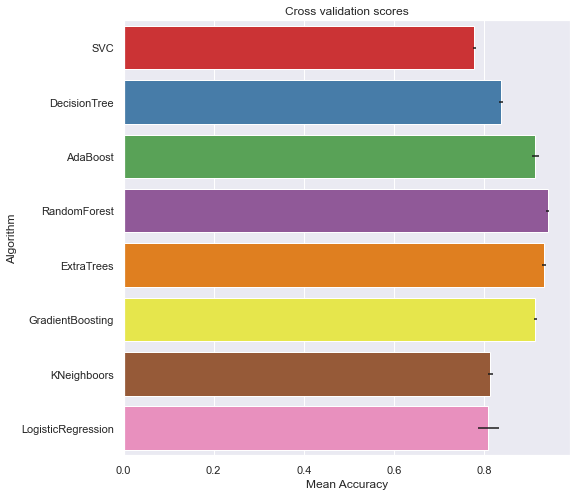

In [109]:
cv_means = []
cv_std   = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","KNeighboors","LogisticRegression"],
                       "CrossValMeans":cv_means,"CrossValerrors": cv_std})
print(cv_res)

g = sns.barplot(x=cv_res["CrossValMeans"],y =cv_res["Algorithm"],  palette="Set1",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

## Selected : AdaBoost , RandomForest , ExtraTrees , GradientBoosting

In [65]:
cv_res

,Algorithm,CrossValMeans,CrossValerrors
0,SVC,0.779071,0.003750
1,DecisionTree,0.837837,0.004246
2,AdaBoost,0.913946,0.007654
3,RandomForest,0.941724,0.002632
4,ExtraTrees,0.933883,0.004933
5,GradientBoosting,0.914780,0.002556
6,KNeighboors,0.814703,0.005208
7,LogisticRegression,0.810387,0.023875


# Tuning Parameter

In [67]:
GBC = GradientBoostingClassifier()
gb_param_grid = {
                 
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8, 10],
              'min_samples_leaf': [1, 10, 50],
              'min_samples_split': [5, 20, 50]
              
              }
rsGBC=RandomizedSearchCV(estimator=GBC,param_distributions=gb_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1, n_iter=20)


rsGBC.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=GradientBoostingClassifier(), n_iter=20, n_jobs=1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [4, 8, 10],
                                        'min_samples_leaf': [1, 10, 50],
                                        'min_samples_split': [5, 20, 50],
                                        'n_estimators': [100, 200, 300]},
                   random_state=3, scoring='roc_auc')

In [68]:
GBC_best = rsGBC.best_estimator_

# Best score
print(rsGBC.best_score_)

0.9501236377633827


In [69]:
GBC_best_y_pred = GBC_best.predict(X_valid)

In [70]:
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [10,20,50,100],
              
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "bootstrap": [False, True],
              "n_estimators" :[100,300]}


rsRFC = RandomizedSearchCV(RFC,param_distributions = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1, n_iter=20)

rsRFC.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [10, 20, 50, 100],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300]},
                   scoring='roc_auc', verbose=1)

In [71]:
RFC_best = rsRFC.best_estimator_

# Best score
print(rsRFC.best_score_)

0.9441685992975323


In [72]:
RFC_best_y_pred = RFC_best.predict(X_valid)

In [73]:
ETC = ExtraTreesClassifier()

etc_param_grid = {"max_depth": [10,20,50,100],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False, True],
              "n_estimators" :[100,300,500]}


rsETC = RandomizedSearchCV(ETC,param_distributions = etc_param_grid, cv=kfold, scoring="roc_auc", n_jobs= -1, verbose = 1, n_iter=20)

rsETC.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=ExtraTreesClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [False, True],
                                        'max_depth': [10, 20, 50, 100],
                                        'min_samples_leaf': [1, 3, 10],
                                        'min_samples_split': [2, 3, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='roc_auc', verbose=1)

In [74]:
ETC_best = rsETC.best_estimator_

# Best score
print(rsETC.best_score_)

0.9398577853759624


In [75]:
ETC_best_y_pred = ETC_best.predict(X_valid)

In [76]:
ADABoost=AdaBoostClassifier(DecisionTreeClassifier())
adaboost_param_grid={
    'learning_rate':[0.05,0.1,0.15,0.2,0.25,0.3],
    'n_estimators'    :[50,100,250,500],
    'algorithm':["SAMME", "SAMME.R"],

}
rsADABoost=RandomizedSearchCV(estimator=ADABoost,param_distributions=adaboost_param_grid,random_state=3,scoring = "roc_auc", 
                                     cv =kfold,n_jobs=1, n_iter=10)

rsADABoost.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                   n_jobs=1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'n_estimators': [50, 100, 250, 500]},
                   random_state=3, scoring='roc_auc')

In [77]:
ADABoost_best = rsADABoost.best_estimator_

# Best score
print(rsADABoost.best_score_)

0.9369693020621858


In [78]:
ADA_best_y_pred = ADABoost_best.predict(X_valid)

# Voting Classifier

In [81]:
votingC = VotingClassifier(estimators=[('gbc',GBC_best), ('rfc', RFC_best),
                                       ('ADABoost',ADABoost_best),("svc",ETC_best)],  voting='soft', n_jobs=4)

votingC = votingC.fit(X_train,y_train)

In [82]:
votingC_y_pred = votingC.predict(X_valid)

In [83]:
print(GBC_best.__class__.__name__, accuracy_score(y_valid, GBC_best_y_pred))
print(RFC_best.__class__.__name__, accuracy_score(y_valid, RFC_best_y_pred))
print(ETC_best.__class__.__name__, accuracy_score(y_valid, ETC_best_y_pred))
print(ADABoost_best.__class__.__name__, accuracy_score(y_valid, ADA_best_y_pred))
print(votingC.__class__.__name__, accuracy_score(y_valid, votingC_y_pred))

GradientBoostingClassifier 0.894467414845442
RandomForestClassifier 0.8984051978735972
ExtraTreesClassifier 0.8909234101201023
AdaBoostClassifier 0.8842291789722386
VotingClassifier 0.9021460917503445


# Test dataset prediction and evaluation

In [84]:
test_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
3363,INN03364,1,0,1,5,Meal Plan 1,0,Room_Type 1,349,2018,10,4,Online,0,0,0,80.00,0,Canceled
1899,INN01900,2,0,2,2,Meal Plan 1,0,Room_Type 4,71,2018,5,1,Online,0,0,0,132.60,0,Canceled
814,INN00815,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2017,9,9,Corporate,0,0,0,65.00,0,Not_Canceled
11491,INN11492,2,1,0,1,Not Selected,0,Room_Type 1,16,2018,8,24,Online,0,0,0,112.81,1,Canceled
19537,INN19538,1,0,0,1,Not Selected,0,Room_Type 1,113,2018,10,13,Online,0,0,0,108.00,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,INN17010,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.00,0,Canceled
7836,INN07837,2,0,2,2,Meal Plan 1,0,Room_Type 1,134,2017,12,4,Offline,0,0,0,65.00,0,Not_Canceled
20377,INN20378,2,0,0,2,Meal Plan 1,0,Room_Type 1,36,2018,4,12,Online,0,0,0,81.08,1,Not_Canceled
8536,INN08537,1,0,1,0,Meal Plan 1,1,Room_Type 1,0,2018,11,14,Corporate,1,0,1,67.00,0,Not_Canceled


In [85]:
test_data['no_nights_stay'] = test_data.apply(lambda x: x['no_of_weekend_nights']+x['no_of_week_nights'], axis=1)

test_data['no_user'] = test_data.apply(lambda x: x['no_of_adults']+x['no_of_children'], axis=1)

test_data['arrival_date']=test_data.apply(lambda row: 28 if (row['arrival_month'] == 2 and row['arrival_date'] > 28) else row['arrival_date'], axis=1)

test_data['booking_status_num'] = test_data.apply(lambda x: 1 if x['booking_status']=='Canceled' else 0,axis=1)

test_data['overall_price'] = test_data['avg_price_per_room'] * test_data['no_nights_stay']
test_data['average_price_per_room_person'] = test_data['avg_price_per_room'] / test_data['no_user']
test_data['overall_price_per_room_person'] = test_data['overall_price'] / test_data['no_user']

type_of_meal_plan_dummy = pd.get_dummies(test_data['type_of_meal_plan'],drop_first=True)
room_type_reserved_dummy = pd.get_dummies(test_data['room_type_reserved'],drop_first=True)
market_segment_type_dummy = pd.get_dummies(test_data['market_segment_type'],drop_first=True)
test_data = pd.concat([test_data,type_of_meal_plan_dummy, room_type_reserved_dummy,market_segment_type_dummy], axis=1)

<ipython-input-85-7a30ce2f5a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['no_nights_stay'] = test_data.apply(lambda x: x['no_of_weekend_nights']+x['no_of_week_nights'], axis=1)
<ipython-input-85-7a30ce2f5a79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['no_user'] = test_data.apply(lambda x: x['no_of_adults']+x['no_of_children'], axis=1)
<ipython-input-85-7a30ce2f5a79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [86]:
test_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
3363,INN03364,1,0,1,5,Meal Plan 1,0,Room_Type 1,349,2018,...,0,0,0,0,0,0,0,0,0,1
1899,INN01900,2,0,2,2,Meal Plan 1,0,Room_Type 4,71,2018,...,0,0,1,0,0,0,0,0,0,1
814,INN00815,1,0,0,2,Meal Plan 1,0,Room_Type 1,5,2017,...,0,0,0,0,0,0,0,1,0,0
11491,INN11492,2,1,0,1,Not Selected,0,Room_Type 1,16,2018,...,0,0,0,0,0,0,0,0,0,1
19537,INN19538,1,0,0,1,Not Selected,0,Room_Type 1,113,2018,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,INN17010,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,...,0,0,0,0,0,0,0,0,1,0
7836,INN07837,2,0,2,2,Meal Plan 1,0,Room_Type 1,134,2017,...,0,0,0,0,0,0,0,0,1,0
20377,INN20378,2,0,0,2,Meal Plan 1,0,Room_Type 1,36,2018,...,0,0,0,0,0,0,0,0,0,1
8536,INN08537,1,0,1,0,Meal Plan 1,1,Room_Type 1,0,2018,...,0,0,0,0,0,0,0,1,0,0


In [89]:
test_data_X = test_data.drop('Booking_ID',axis = 'columns').drop('booking_status',axis = 'columns').drop('booking_status_num',axis = 'columns').drop('type_of_meal_plan',axis = 'columns').drop('room_type_reserved',axis = 'columns').drop('market_segment_type',axis = 'columns')

In [87]:
test_data_Y = test_data['booking_status_num']

In [90]:
test_data_X

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,Complementary,Corporate,Offline,Online
3363,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,0,0,0,0,0,1
1899,2,0,2,2,0,71,2018,5,1,0,...,0,0,1,0,0,0,0,0,0,1
814,1,0,0,2,0,5,2017,9,9,0,...,0,0,0,0,0,0,0,1,0,0
11491,2,1,0,1,0,16,2018,8,24,0,...,0,0,0,0,0,0,0,0,0,1
19537,1,0,0,1,0,113,2018,10,13,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,1,0,2,1,0,116,2018,2,28,0,...,0,0,0,0,0,0,0,0,1,0
7836,2,0,2,2,0,134,2017,12,4,0,...,0,0,0,0,0,0,0,0,1,0
20377,2,0,0,2,0,36,2018,4,12,0,...,0,0,0,0,0,0,0,0,0,1
8536,1,0,1,0,1,0,2018,11,14,1,...,0,0,0,0,0,0,0,1,0,0


In [91]:
test_data_X2 = test_data_X.loc[:,rfe.support_]

In [92]:
test_data_X2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,average_price_per_room_person,overall_price_per_room_person,Meal Plan 2,Not Selected,Room_Type 2,Room_Type 4,Room_Type 5,Corporate,Offline,Online
3363,1,0,1,5,0,349,2018,10,4,0,...,80.000000,480.000000,0,0,0,0,0,0,0,1
1899,2,0,2,2,0,71,2018,5,1,0,...,66.300000,265.200000,0,0,0,1,0,0,0,1
814,1,0,0,2,0,5,2017,9,9,0,...,65.000000,130.000000,0,0,0,0,0,1,0,0
11491,2,1,0,1,0,16,2018,8,24,0,...,37.603333,37.603333,0,1,0,0,0,0,0,1
19537,1,0,0,1,0,113,2018,10,13,0,...,108.000000,108.000000,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17009,1,0,2,1,0,116,2018,2,28,0,...,61.000000,183.000000,0,0,0,0,0,0,1,0
7836,2,0,2,2,0,134,2017,12,4,0,...,32.500000,130.000000,0,0,0,0,0,0,1,0
20377,2,0,0,2,0,36,2018,4,12,0,...,40.540000,81.080000,0,0,0,0,0,0,0,1
8536,1,0,1,0,1,0,2018,11,14,1,...,67.000000,67.000000,0,0,0,0,0,1,0,0


VotingClassifier 0.8995681337866397
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7317
           1       0.88      0.80      0.84      3566

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.90      0.90      0.90     10883



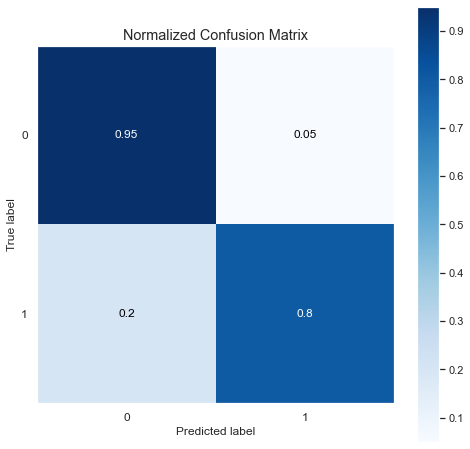

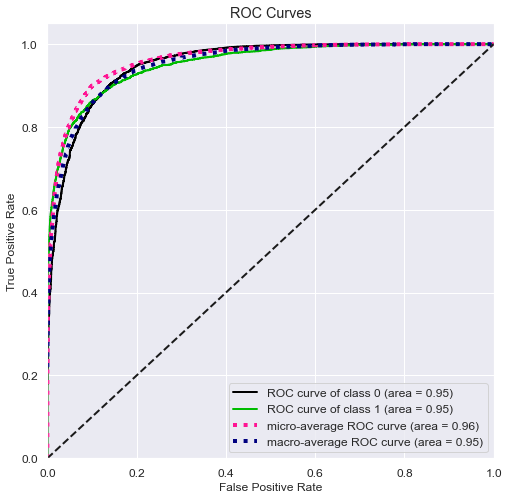

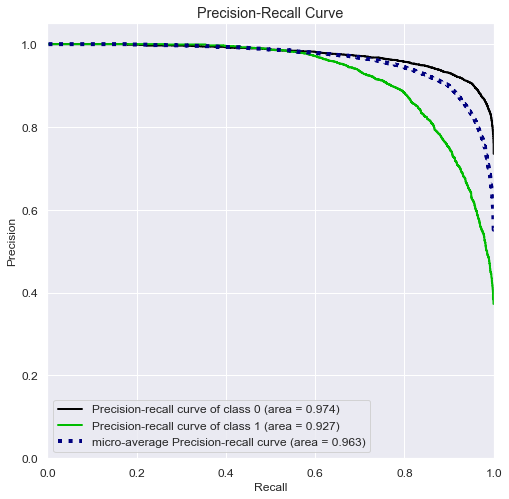

In [101]:
y_test_probas = votingC.predict_proba(test_data_X2)
y_test_predict = votingC.predict(test_data_X2)

print(votingC.__class__.__name__, accuracy_score(test_data_Y, y_test_predict))
print(classification_report(test_data_Y, y_test_predict))

sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(test_data_Y, y_test_predict, normalize=True)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_roc(test_data_Y, y_test_probas)
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_precision_recall(test_data_Y, y_test_probas)